## CIFO Crossover Analysis_1

Let's try to make use of the logger.

Idea -> Load Data into Frame and compute statistics and graphs

In [26]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [27]:
headers = ["iteration", "elite.fitness", "elite.validation_fitness", "population_size", "selection_method", "crossover_method", "crossover_rate",
                             "mutation_method", "None", "None", "mutation_rate", "phenotypic_diversity_shift", "unknown"]

In [28]:
#loading CSV of CIFO data
crossover_1 = pd.read_csv("crossover_analysis_1.csv",
                             sep= ",",
                             header = None,
                             names = headers)

crossover_2 = pd.read_csv("crossover_analysis_2.csv",
                             sep= ",",
                             header = None,
                             names = headers)

crossover_3 = pd.read_csv("crossover_analysis_3.csv",
                             sep= ",",
                             header = None,
                             names = headers)

crossover = pd.concat([crossover_1, crossover_2, crossover_3])

crossover["Pressure"] = 0.5
crossover = crossover.reset_index(drop=True)
crossover = crossover.drop(["None", "None.1"], axis=1)

In [29]:
crossover.describe()

iteration  elite.fitness  elite.validation_fitness  population_size  \
count  1800.000000    1800.000000               1800.000000           1800.0   
mean     49.500000       0.231992                  0.225809             50.0   
std      28.874092       0.030169                  0.040566              0.0   
min       0.000000       0.153846                  0.132780             50.0   
25%      24.750000       0.214137                  0.199170             50.0   
50%      49.500000       0.229730                  0.219917             50.0   
75%      74.250000       0.255717                  0.253112             50.0   
max      99.000000       0.285863                  0.294606             50.0   

       crossover_rate  mutation_rate  phenotypic_diversity_shift      unknown  \
count          1800.0   1.800000e+03                 1800.000000  1800.000000   
mean              0.5   9.000000e-01                   -0.000017     0.053333   
std               0.0   2.332116e-14                    0.008119     0.036828   
min               0.5   9.000000e-01                   -0.044581     0.010000   
25%               0.5   9.000000e-01                   -0.004293     0.010000   
50%               0.5   9.000000e-01                    0.000163     0.050000   
75%               0.5   9.000000e-01                    0.004877     0.100000   
max               0.5   9.000000e-01                    0.029439     0.100000   

       Pressure  
count    1800.0  
mean        0.5  
std         0.0  
min         0.5  
25%         0.5  
50%         0.5  
75%         0.5  
max         0.5

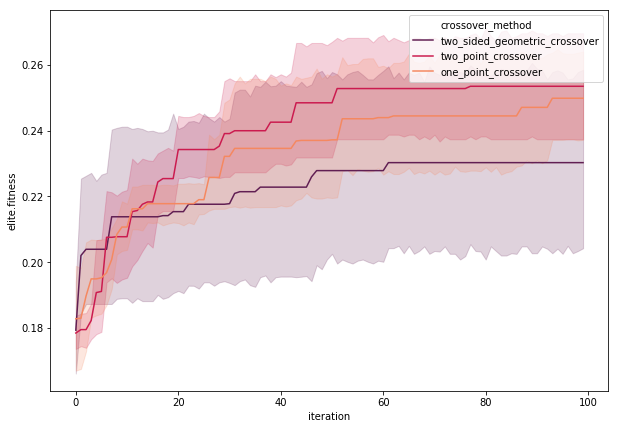

In [25]:
plt.subplots(figsize=(10,7))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="crossover_method",
             data=mutation,
            palette= "rocket",
            err_style="band",
            legend="full")